In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

#because images are 28x28 pixels
encoding_dim = 32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation = 'relu')(input_img)

decoded = layers.Dense(784, activation = 'sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

x_train = x_train.astype(np.float32) / 255.
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.astype(np.float32) / 255.
x_test = x_test.reshape((x_test.shape[0], 784))

model = Sequential()
model.add(Dense(784,  activation='relu'))
model.add(Dense(392, activation='relu'))
model.add(Dense(98, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(98,  activation='relu'))
model.add(Dense(392, activation='relu'))
model.add(Dense(784, activation='sigmoid'))


model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, x_train, epochs = 3)

# 
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
# 



autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs = 25, batch_size = 256,
                shuffle = True, validation_data = (x_test, x_test))

Epoch 1/3
1875/1875 [==============================] - 25s 13ms/step - loss: 5.0191 - accuracy: 0.0016
Epoch 2/3
1002/1875 [===============>..............] - ETA: 11s - loss: 4.0710 - accuracy: 7.2870e-04

KeyboardInterrupt: 

In [9]:
model.summary()
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (32, 784)                 615440    
_________________________________________________________________
dense_23 (Dense)             (32, 392)                 307720    
_________________________________________________________________
dense_24 (Dense)             (32, 98)                  38514     
_________________________________________________________________
dense_25 (Dense)             (32, 32)                  3168      
_________________________________________________________________
dense_26 (Dense)             (32, 98)                  3234      
_________________________________________________________________
dense_27 (Dense)             (32, 392)                 38808     
_________________________________________________________________
dense_28 (Dense)             (32, 784)                

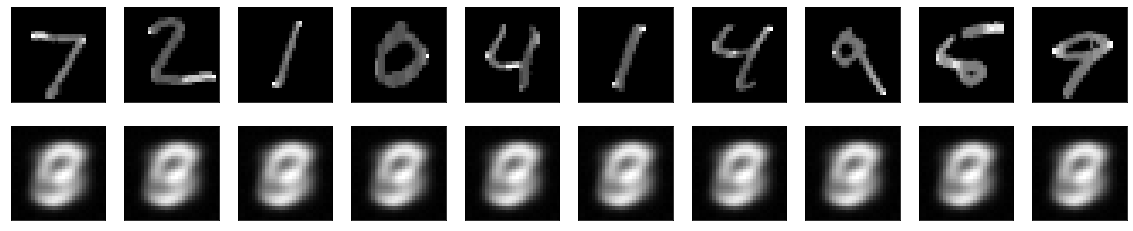

In [10]:

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()